### K-Means Clustering of Countries Dataset

In [2]:
#Import Statements
import numpy as np
import pandas as pd

#Imports for plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.style.use('default')
%matplotlib inline


#Imports for Evaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy import stats

from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [3]:
#Reading the Dataset
df = pd.read_csv('Country-data.csv',index_col=0)
display(df.head())
display(len(df))

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


167

In [4]:
#Information of the country dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [5]:
#statistics of the data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#Finding and analyzing the outliers
z = np.abs(stats.zscore(df))
print(z)
threshold = 3
outliers = np.where(z > threshold)
print(outliers[1])
df.iloc[outliers[0]]

[[1.29153238 1.13827979 0.27908825 ... 1.61909203 1.90288227 0.67917961]
 [0.5389489  0.47965843 0.09701618 ... 0.64786643 0.85997281 0.48562324]
 [0.27283273 0.09912164 0.96607302 ... 0.67042323 0.0384044  0.46537561]
 ...
 [0.37231541 1.13030491 0.0088773  ... 0.28695762 0.66120626 0.63775406]
 [0.44841668 0.40647827 0.59727159 ... 0.34463279 1.14094382 0.63775406]
 [1.11495062 0.15034774 0.33801514 ... 2.09278484 1.6246091  0.62954556]]
[4 0 6 4 1 3 4 8 1 3 7 5 8 4 8 0 1 3 8 2 5]


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100


In [7]:
# Standard Scaling of the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#statistics of the scaled data
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,3.988825e-18,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [8]:
# k means using 5 clusters with k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)
cluster_centroid = kmeans.cluster_centers_ # Cluster centroid vectors
# inertia on the fitted data
kmeans.inertia_

633.1698965009202

Text(0, 0.5, 'Inertia')

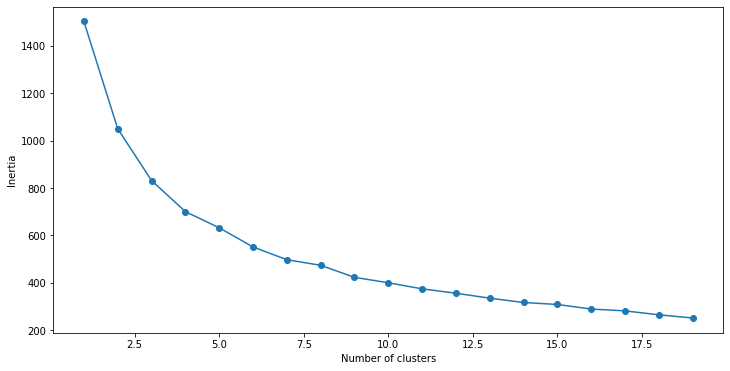

In [9]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

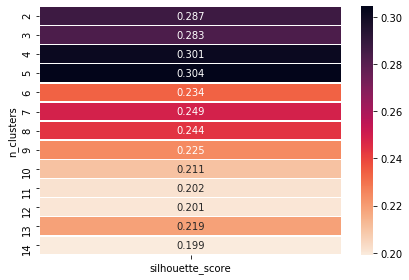

In [10]:
#Heatmap for selection of the best possible k value
from sklearn.metrics import silhouette_samples, silhouette_score
cluster_range = range(2,15)

results = []

for c in cluster_range:
    clusterer = KMeans(init='k-means++',n_clusters=c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])

pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [11]:
cluster_df = pd.DataFrame(scaled_data)
cluster_df['cluster'] = pred
cluster_df['cluster'].value_counts()

4    55
0    41
2    41
1    27
3     3
Name: cluster, dtype: int64

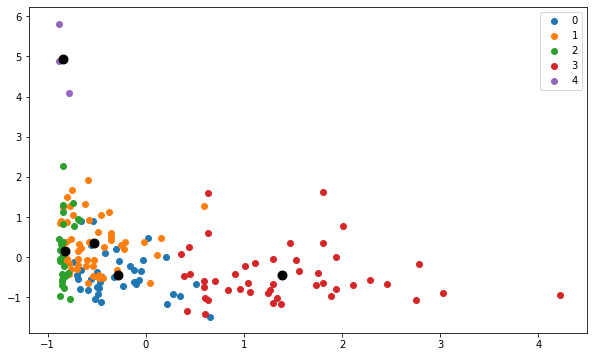

In [12]:
#Visualization of the k-means clustering using scaled data
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = 5, init='k-means++')

# fitting the k means algorithm on scaled data
label = kmeans.fit_predict(scaled_data)

#Getting the Centroids
centroids = kmeans.cluster_centers_

#Getting Unique Labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(scaled_data[label == i , 0] , scaled_data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,6)
fig.savefig('kmeans.png', dpi=100)
plt.show()

### Hierarchical Clustering

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

from plotnine import *
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy import stats

In [13]:
data = pd.read_csv("Country-data.csv",index_col=0)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


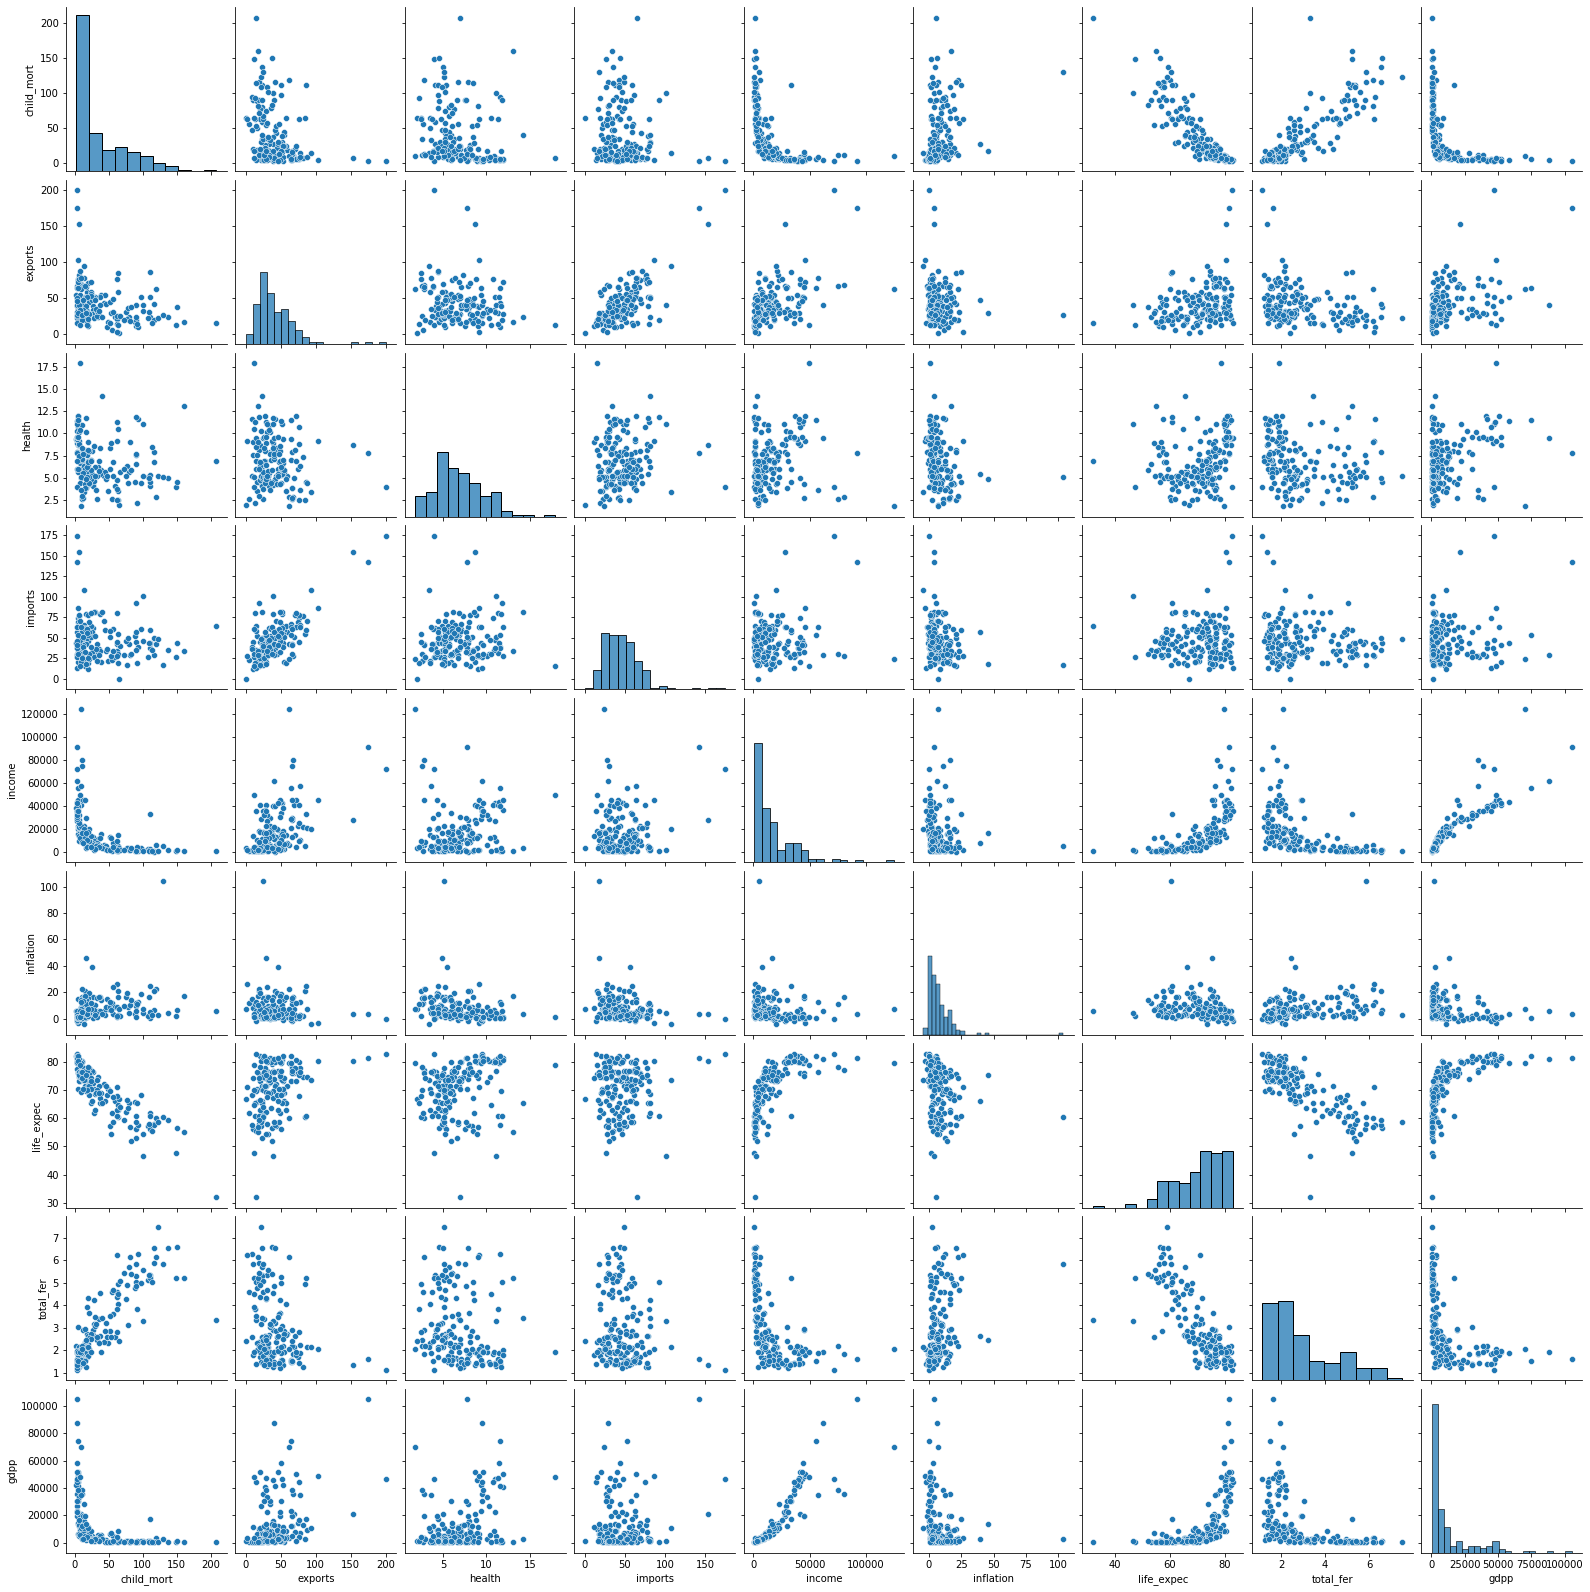

In [14]:
sns.pairplot(data)

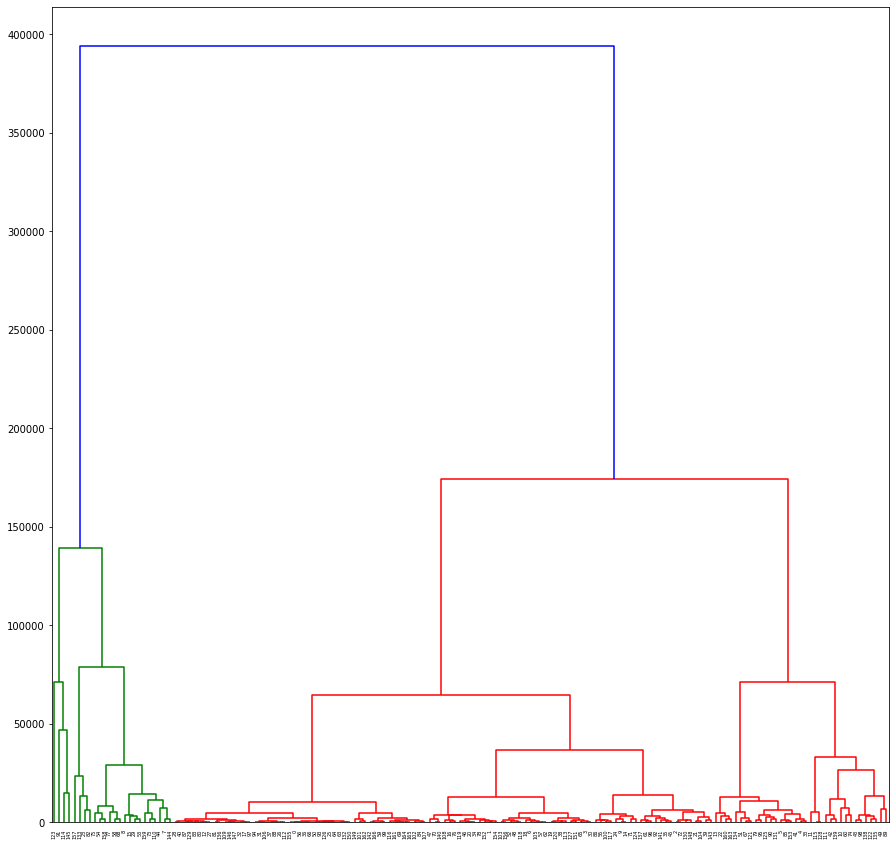

In [15]:
#creating the Agglomerative(Hierarchical)Clustering Model
clustering_model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

#plotting the dendrogram to find the feasible no.of clusters
plt.figure(figsize=(15,15))

Dendogram = dendrogram(linkage(data,method='ward',metric = 'euclidean'))

plt.show()

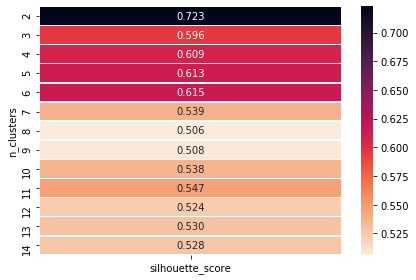

In [16]:
#clustering the data
fit_data = clustering_model.fit(data)
labels = fit_data.labels_
labels

#Heatmap for selection of the best possible k value
from sklearn.metrics import silhouette_samples, silhouette_score
cluster_range = range(2,15)

results = []

for c in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=c,affinity='euclidean',linkage='ward')
    cluster_labels = clusterer.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])

pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [17]:
#Adding the Cluster Label of eaach data sample in the dataframe with a ne column 'Cluster'
sns.set_style("whitegrid")
data['Cluster'] = labels
class0 = data[data['Cluster']==0]
class1 = data[data['Cluster']==1]

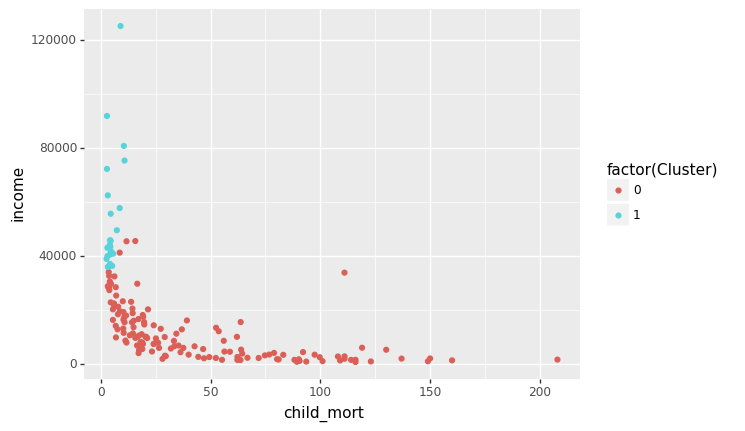

<ggplot: (-9223371894423108832)>

In [18]:
#plotting the scatterplot with Child_Mort and Income as attributes

(ggplot(data,aes(x='child_mort' , y ='income',color='factor(Cluster)'))+ geom_point())

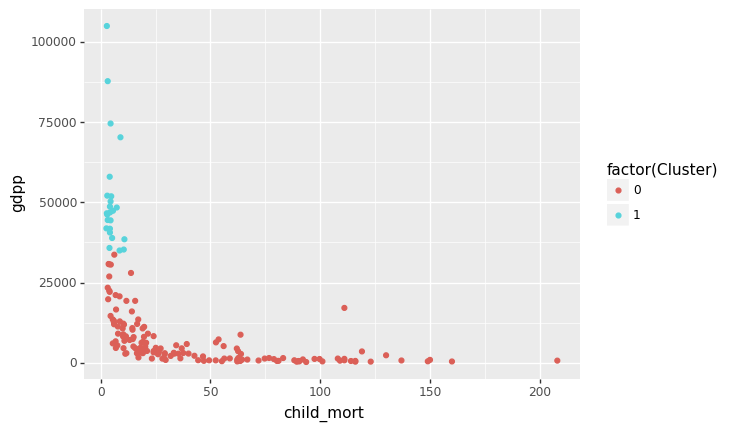

<ggplot: (-9223371894423931372)>

In [19]:
#plotting the scatterplot with Child_Mort and gdpp as attributes

(ggplot(data,aes(x='child_mort' , y ='gdpp',color='factor(Cluster)'))+ geom_point())

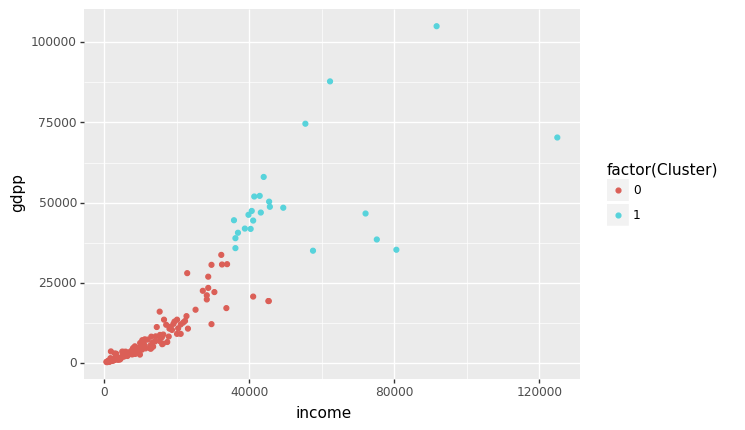

<ggplot: (-9223371894423089200)>

In [20]:
#plotting the scatterplot with Income and gdpp as attributes

(ggplot(data,aes(x='income' , y ='gdpp',color='factor(Cluster)'))+ geom_point())

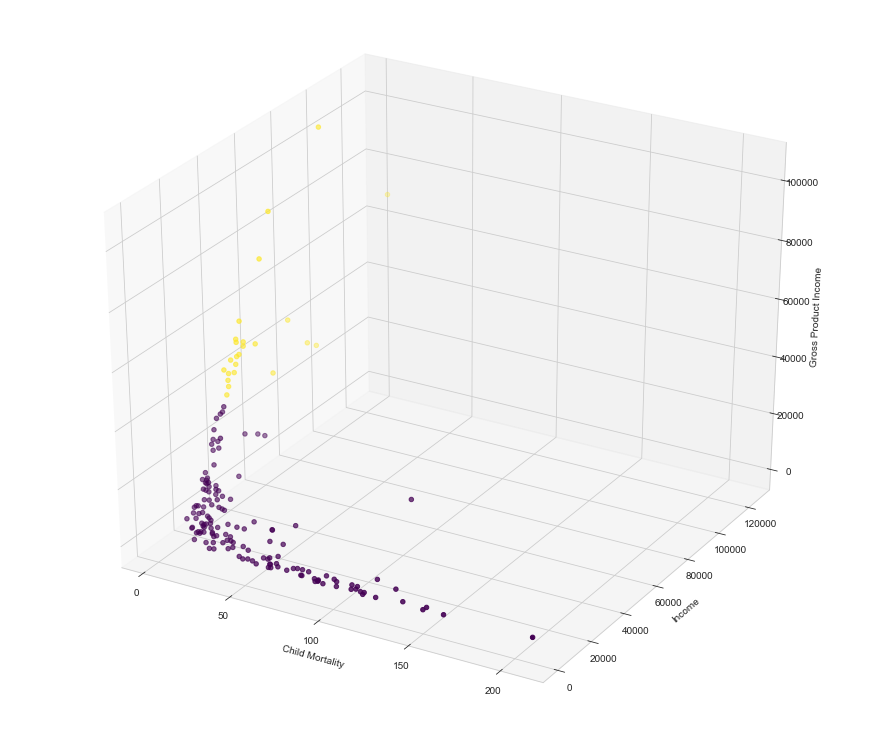

In [21]:
#creating a 3D plot for attributes Income GDPP and Child_Mortality

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,10))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

ax.set_xlabel('Child Mortality')
ax.set_ylabel('Income')
ax.set_zlabel('Gross Product Income')


# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(data['child_mort'], data['income'], data['gdpp'], c=data['Cluster'],cmap=plt.cm.viridis,marker='o')

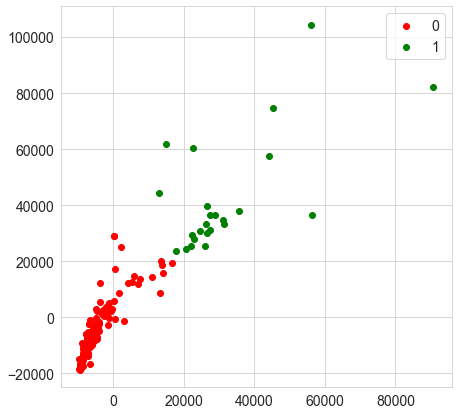

In [22]:
#Multi-dimensional Scaling of Hierarchical Clustering
from sklearn.manifold import MDS
import matplotlib.cm as cm
sns.set_style("whitegrid")

model = MDS(n_components=2, random_state=2,dissimilarity='euclidean')
outS = model.fit_transform(data)
    
    
colors = ['red','green']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)


for i in np.unique(data.Cluster):
    #print(i)
    subset = outS[data.Cluster == i]
  
    x = [row[0] for row in subset]
    #print("value of x is"," ",x)
    y = [row[1] for row in subset]
    #print("value of  Y is"," ",y)

    plt.scatter(x,y,c=colors[i],label=i)
plt.legend()
plt.show()